<a href="https://colab.research.google.com/github/giangkarry/Generalized-max-median-filtering/blob/main/Generalized_max_median_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
%matplotlib inline

In [ ]:
def get_image_scale(im, c): 
  return im[:,:,c]

def set_image_scale(im, c, to):
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im[i][j][c] = to[i][j]
    return im

'''
Add salt and pepper noise to image
'''
def generate_noise(im):
  noise_percentage = 0.05 # probability of the noise
  result = np.zeros(im.shape, dtype=im.dtype)
  thres = 1 - noise_percentage
  for i in range(im.shape[0]):
      for j in range(im.shape[1]):
          rdn = random.random()
          if rdn < noise_percentage:
              result[i][j] = 0 # pepper noise
          elif rdn > thres:
              result[i][j] = 255 # salt noise
          else:
              result[i][j] = im[i][j]
  return result

def generate_noise_rgb(im):
    result = np.zeros(im.shape, dtype=im.dtype)
    for i in range(3):
        set_image_scale(result, i, generate_noise(get_image_scale(im, i)))
    return result

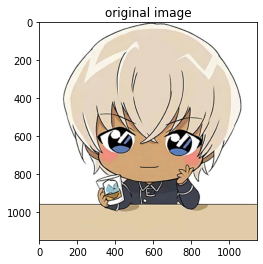

In [ ]:
IMAGE_PATH = "11.jpg"
#IMAGE_NAME = IMAGE_PATH.split('.')[-2]
image = cv2.imread(IMAGE_PATH)
plt.imshow(image[:,:,::-1])
plt.title('original image')
plt.show()


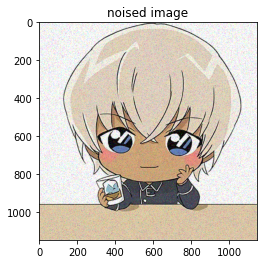

In [ ]:
nimage = generate_noise_rgb(image)
plt.imshow(nimage[:,:,::-1])
plt.title('noised image')
plt.show()

**Max/median filtering**

In [ ]:
'''
W: (2n+1)x(2n+1) square window
'''
def max_median_filter(image, n):
    im = np.pad(image, ((n, n), (n, n)), 'edge') # edge processing -> image's size is MxN
    M = im.shape[0]
    N = im.shape[1]
    result = np.zeros(im.shape, dtype=im.dtype)
    for i in range(n, M - n):
        for j in range(n, N - n):
            W1 = []
            W2 = []
            W3 = []
            W4 = []
            for k in range(-n, n + 1):
                W1.append(im[i][j + k])   #1
                W2.append(im[i + k][j + k]) #2
                W3.append(im[i + k][j]) # 3
                W4.append(im[i - k][j + k]) #4
            z1 = sorted(W1)[n] # W1's median
            z2 = sorted(W2)[n] # W2's median
            z3 = sorted(W3)[n] # W3's median
            z4 = sorted(W4)[n] # W4's median
            result[i][j] = max(z1, z2, z3, z4) #5
    return result[n: -n, n: -n] # original size

def max_median_filter_rgb(im, n):
    result = np.zeros(im.shape, dtype=im.dtype)
    for i in range(3):
        set_image_scale(result, i, max_median_filter(get_image_scale(im, i), n,))
    return result

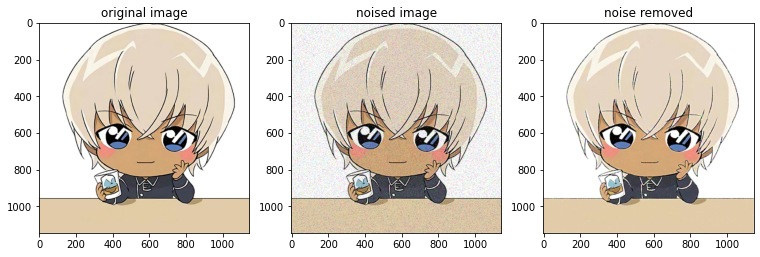

In [ ]:
'''Result'''
fimage = max_median_filter_rgb(nimage, 2)
plt.figure(figsize=(6.4*2, 4.8*2))
plt.subplot(1,3,1)
plt.imshow(image[:,:,::-1]), plt.title("original image")
plt.subplot(1,3,2)
plt.imshow(nimage[:,:,::-1]), plt.title("noised image")
plt.subplot(1,3,3)
plt.imshow(fimage[:,:,::-1]), plt.title("noise removed")
plt.show()

**Generalized max/median filtering**

In [ ]:
'''
W: (2n+1)x(2n+1) square window
r: random value that satisfies 1 <= r <= n
'''
def gmax_median_filter(image, n, r):
    im = np.pad(image, ((n, n), (n, n)), 'edge') # edge processing -> image's size is MxN
    M = im.shape[0]
    N = im.shape[1]
    result = np.zeros(im.shape, dtype=im.dtype)
    t = 2 * n - r # t, r in the report >= 1
    r = r-1
    for i in range(n, M - n):
        for j in range(n, N - n):
            W1 = []
            W2 = []
            W3 = []
            W4 = []
            for k in range(-n, n + 1):
                if k == 0:
                    continue
                W1.append(im[i][j + k])   #7
                W2.append(im[i + k][j + k]) #8
                W3.append(im[i + k][j]) #9
                W4.append(im[i - k][j + k]) #10

            W1 = sorted(W1)
            W2 = sorted(W2)
            W3 = sorted(W3)
            W4 = sorted(W4)
            s1 = max(W1[r], W2[r], W3[r], W4[r]) #12
            s2 = max(W1[t], W2[t], W3[t], W4[t]) #13
            result[i][j] = sorted([s1, s2, im[i][j]])[1] #11
    return result[n: -n, n: -n] # original size

def gmax_median_filter_rgb(im, n, r):
    result = np.zeros(im.shape, dtype=im.dtype)
    for i in range(3):
        set_image_scale(result, i, gmax_median_filter(get_image_scale(im, i), n, r))
    return result

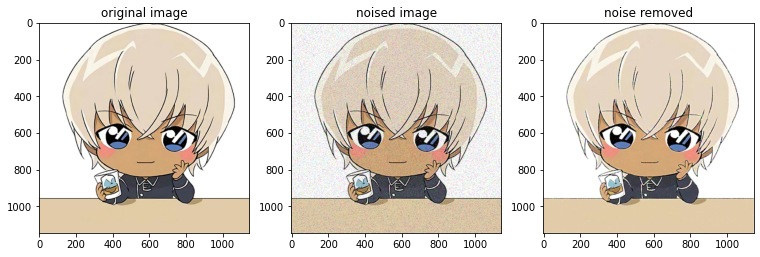

In [ ]:
'''Result'''
gfimage = gmax_median_filter_rgb(nimage, 2, 2)
plt.figure(figsize=(6.4*2, 4.8*2))
plt.subplot(1,3,1)
plt.imshow(image[:,:,::-1]), plt.title("original image")
plt.subplot(1,3,2)
plt.imshow(nimage[:,:,::-1]), plt.title("noised image")
plt.subplot(1,3,3)
plt.imshow(gfimage[:,:,::-1]), plt.title("noise removed")
plt.show()